# includes

In [24]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc, DEF_INTERVAL, SYMBOL
from capture_plot import CaptureOnClick
# SYMBOLS = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT']

TOTAL_CANDLES = 100

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [25]:
print(mpf.__version__)

0.12.10b0


# simple flow

## Configure data input

### Presets

- SYMBOLS = 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT'
- INTERVALS = '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M'
- TOTAL_CANDLES = 100
- SYMBOL = 'BTCUSDT'
- DEF_INTERVAL ='15m'


SYMBOLS must be included into data_proc as well to create datastore structure (to be fixed)

In [26]:
#initialize data processor
dp = DataProc('.\\.data\\ntb\\v0.0504a\\')

print(dp)

#### Configure data

In [27]:

#datamap initialized with SYMBOLS entriesm  each may hold OCHL data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here, (TODO:and updated when needed )
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore[SYMBOL][DEF_INTERVAL])

#default load:
last_updated = datamap[SYMBOL][DEF_INTERVAL]['Updated']
start_date = datamap[SYMBOL][DEF_INTERVAL]['StartDate']
end_date = datamap[SYMBOL][DEF_INTERVAL]['EndDate']

total_candles = pd

print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval}, between: {start_date} and {end_date}, loaded on {last_updated}  \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')


we have: 100 candles of BTCUSDT at 15m, between: 2024-01-19 15:15:00 and 2024-01-20 16:00:00, loaded on 2024-01-20 18:04:40.366746  

(15, 4) (15, 4) (100, 5) 

DatetimeIndex(['2024-01-19 15:15:00', '2024-01-19 15:30:00',
               '2024-01-19 15:45:00', '2024-01-19 16:00:00',
               '2024-01-19 16:15:00'],
              dtype='datetime64[ns]', name='Date', freq=None) 

                         Open      High       Low     Close      Volume
Date                                                                   
2024-01-19 15:15:00  40931.10  41156.38  40789.33  40826.02  1128.24149
2024-01-19 15:30:00  40826.01  40936.84  40718.00  40840.82   925.75737
2024-01-19 15:45:00  40840.83  41081.37  40811.10  40894.71   672.33152
2024-01-19 16:00:00  40894.71  40953.59  40803.82  40803.83   661.92043
2024-01-19 16:15:00  40803.83  40839.00  40532.00  40610.24  1536.55271 



#### Load data

In [28]:
# pair_df,_,_ = dp.get_data('BTCUSDT', '1h')
 
print(dp.pair_df)

(                         Open      High       Low     Close      Volume
Date                                                                   
2024-01-19 15:15:00  40931.10  41156.38  40789.33  40826.02  1128.24149
2024-01-19 15:30:00  40826.01  40936.84  40718.00  40840.82   925.75737
2024-01-19 15:45:00  40840.83  41081.37  40811.10  40894.71   672.33152
2024-01-19 16:00:00  40894.71  40953.59  40803.82  40803.83   661.92043
2024-01-19 16:15:00  40803.83  40839.00  40532.00  40610.24  1536.55271
...                       ...       ...       ...       ...         ...
2024-01-20 15:00:00  41542.98  41550.42  41478.00  41529.16   264.37354
2024-01-20 15:15:00  41529.16  41614.75  41521.37  41602.88   170.57592
2024-01-20 15:30:00  41602.88  41688.53  41601.47  41601.48   256.62299
2024-01-20 15:45:00  41601.47  41621.86  41560.00  41570.11   122.30814
2024-01-20 16:00:00  41570.10  41591.10  41561.58  41563.34    55.98952

[100 rows x 5 columns], 'BTCUSDT', '15m')


## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

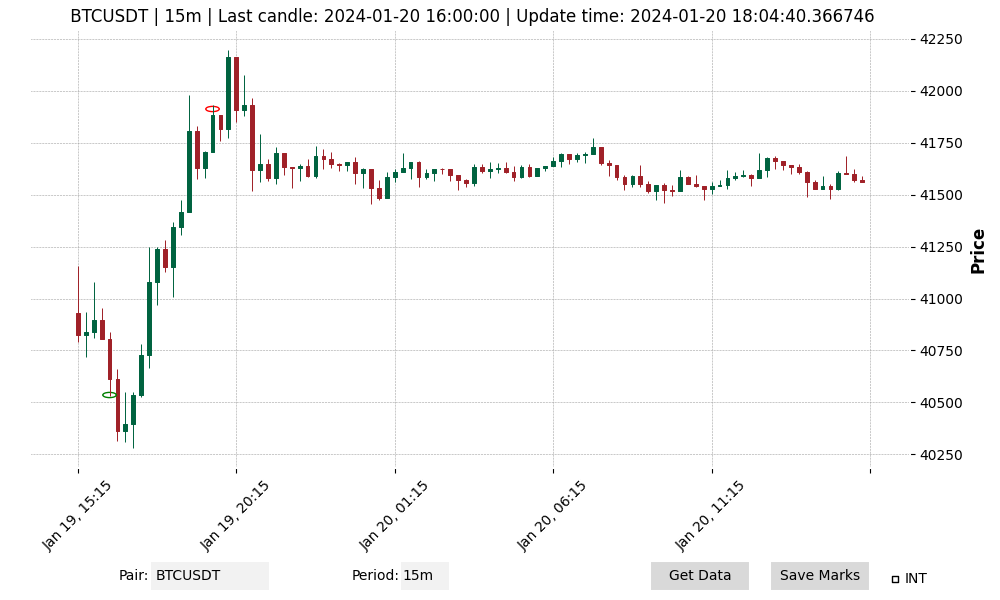

In [29]:
plt = CaptureOnClick(data_proc=dp)
#plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)

## Utils. 
* Store selections

In [30]:
# Save points to file
# plotter.save_m_to_file()
# plt = plotter_default
print(f'Current pair: {plt.pair} current interval: {plt.interval}')


Current pair: BTCUSDT current interval: 15m


## debug print from chart, on mouse click 

In [31]:
print(plt.captured_output)

date: 2024-01-19 19:30:00, x_coord: 17


In [9]:
df = pd.DataFrame(datamap)

df = df.loc[:, df.notna().any()][:5]

print(df)

                                               BTCUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': 2024-01-17 16:45:00, 'EndDate': ...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               ETHUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               SOLUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'Start

In [11]:
del pd
del plt